<a href="https://colab.research.google.com/github/KalonteJT/AI/blob/master/HW2_Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
import numpy as np

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape


(60000, 28, 28)

In [7]:
len(train_images)

60000

In [8]:
train_images.ndim

3

In [9]:
train_images.dtype

dtype('uint8')

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**UNDERFIT**

In [35]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.selu)
])
# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/sample - loss: 2.5955 - acc: 0.1164 - val_loss: 2.4870 - val_acc: 0.1000
Epoch 2/20
60000/60000 [==============================] - 3s 50us/sample - loss: 2.4850 - acc: 0.1002 - val_loss: 2.4872 - val_acc: 0.0999
Epoch 3/20
60000/60000 [==============================] - 3s 50us/sample - loss: 2.4851 - acc: 0.0997 - val_loss: 2.4866 - val_acc: 0.1000
Epoch 4/20
60000/60000 [==============================] - 3s 51us/sample - loss: 2.4849 - acc: 0.1001 - val_loss: 2.4866 - val_acc: 0.1000
Epoch 5/20
60000/60000 [==============================] - 3s 51us/sample - loss: 2.4849 - acc: 0.1001 - val_loss: 2.4866 - val_acc: 0.1000
Epoch 6/20
60000/60000 [==============================] - 3s 50us/sample - loss: 2.4849 - acc: 0.1001 - val_loss: 2.4866 - val_acc: 0.1000
Epoch 7/20
60000/60000 [==============================] - 3s 51us/sample - loss: 2.4849 - acc: 0.1001 - val_loss: 2.

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 28us/sample - loss: 2.4866 - acc: 0.1000
Test accuracy: 0.1


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)


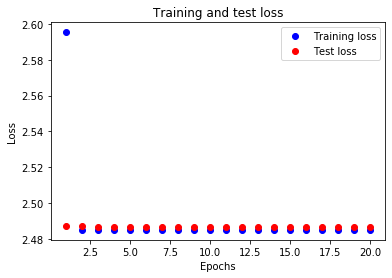

In [38]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

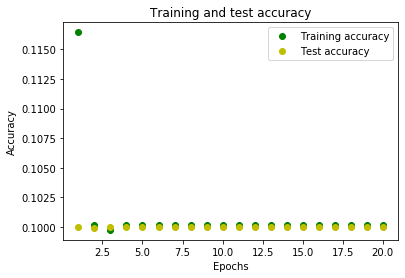

In [39]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'go', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'yo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**OVERFIT**

In [20]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.softmax),
])
# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4991 - acc: 0.8225 - val_loss: 0.4461 - val_acc: 0.8402
Epoch 2/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3704 - acc: 0.8657 - val_loss: 0.3866 - val_acc: 0.8632
Epoch 3/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3344 - acc: 0.8773 - val_loss: 0.3792 - val_acc: 0.8674
Epoch 4/20
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3094 - acc: 0.8850 - val_loss: 0.3431 - val_acc: 0.8772
Epoch 5/20
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2926 - acc: 0.8908 - val_loss: 0.3346 - val_acc: 0.8808
Epoch 6/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2778 - acc: 0.8955 - val_loss: 0.3500 - val_acc: 0.8766
Epoch 7/20
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2640 - acc: 0.8997 - val_loss: 0.

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3454 - acc: 0.8918
Test accuracy: 0.8918


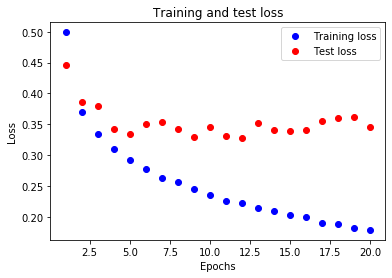

In [22]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

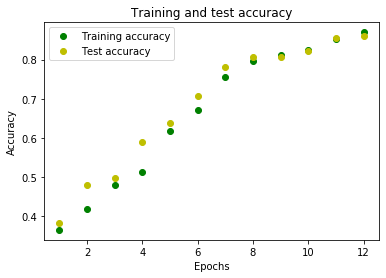

In [33]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'go', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'yo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**BETTER_FIT**

In [25]:
keep_prob = tf.placeholder(tf.float32)

# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    #Placing the drop out here
    keras.layers.Dropout(.5),
    keras.layers.Dense(32, activation=tf.nn.softmax),
    keras.layers.Dense(16, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model 
epochs = 12
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 87us/sample - loss: 1.8048 - acc: 0.3652 - val_loss: 1.4462 - val_acc: 0.3816
Epoch 2/12
60000/60000 [==============================] - 5s 85us/sample - loss: 1.3071 - acc: 0.4180 - val_loss: 1.1086 - val_acc: 0.4802
Epoch 3/12
60000/60000 [==============================] - 5s 86us/sample - loss: 1.0270 - acc: 0.4802 - val_loss: 0.9755 - val_acc: 0.4978
Epoch 4/12
60000/60000 [==============================] - 5s 86us/sample - loss: 0.9497 - acc: 0.5138 - val_loss: 0.9066 - val_acc: 0.5909
Epoch 5/12
60000/60000 [==============================] - 5s 84us/sample - loss: 0.8467 - acc: 0.6190 - val_loss: 0.8053 - val_acc: 0.6371
Epoch 6/12
60000/60000 [==============================] - 5s 83us/sample - loss: 0.7763 - acc: 0.6707 - val_loss: 0.7442 - val_acc: 0.7076
Epoch 7/12
60000/60000 [==============================] - 5s 84us/sample - loss: 0.6943 - acc: 0.7563 - val_loss: 0.

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.4607 - acc: 0.8609
Test accuracy: 0.8609


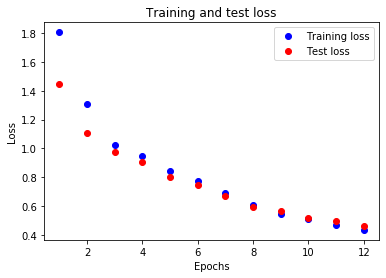

In [27]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

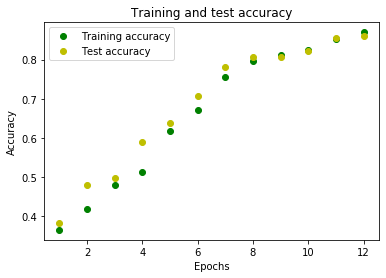

In [32]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'go', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'yo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()